In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [90]:
##Load data
df_fifa = pd.read_csv(r'C:\Users\91797\Documents\python\groupProjectFifa\Dataset and relavant files - Python Project 1\fifa.csv')
df_fifa.head()


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [91]:
df_fifa_info = pd.read_csv(r'C:\Users\91797\Documents\python\groupProjectFifa\Dataset and relavant files - Python Project 1\fifa_ variable_information.csv')
df_fifa_info.head()

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag


In [92]:
##explore data
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [93]:
##explore data 
print(df_fifa.shape)
print('Rows: ',df_fifa.shape[0])
print('Columns: ', df_fifa.shape[1])

(18207, 60)
Rows:  18207
Columns:  60


In [94]:
##explore data 
df_fifa.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0
Crossing,18159.0,49.734181,18.364524,5.0,38.0,54.0,64.0,93.0
Finishing,18159.0,45.550911,19.525820,2.0,30.0,49.0,62.0,95.0


In [95]:
df_fifa['ID'].nunique()

18207

In [96]:
len(df_fifa[df_fifa.duplicated()])

0

In [97]:
df_fifa.drop(['Photo', 'Flag', 'Club Logo'], axis=1, inplace=True)
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

In [98]:
##4-Convert the columns "Value", "Wage", "Release Clause" to float datatype after getting rid of currency symbol and suffix. (6 points)

def convert_value_to_float(value):
    if pd.isnull(value):
        return value
    if 'M' in value:
        return float(value.replace('€', '').replace('M', '')) * 1000000
    if 'K' in value:
        return float(value.replace('€', '').replace('K', '')) * 1000
    return float(value.replace('€', ''))

columns_to_convert = ['Value', 'Wage', 'Release Clause']
df_fifa[columns_to_convert] = df_fifa[columns_to_convert].applymap(convert_value_to_float)

print('Columns converted to float after removing currency symbol and suffix.')

Columns converted to float after removing currency symbol and suffix.


In [99]:
yoyo = df_fifa[['Value', 'Wage', 'Release Clause']].dtypes
yo = df_fifa[['Value', 'Wage', 'Release Clause']]
print(yoyo)
print(yo)

Value             float64
Wage              float64
Release Clause    float64
dtype: object
             Value      Wage  Release Clause
0      110500000.0  565000.0     226500000.0
1       77000000.0  405000.0     127100000.0
2      118500000.0  290000.0     228100000.0
3       72000000.0  260000.0     138600000.0
4      102000000.0  355000.0     196400000.0
...            ...       ...             ...
18202      60000.0    1000.0        143000.0
18203      60000.0    1000.0        113000.0
18204      60000.0    1000.0        165000.0
18205      60000.0    1000.0        143000.0
18206      60000.0    1000.0        165000.0

[18207 rows x 3 columns]


In [100]:
##5- Convert the column "Joined" into integer data type with keeping only the year.
def convert_joined(obj):
    
    if isinstance(obj, str):
        
        year_part = obj.split(',')[1].split()
        numeric_value = pd.to_numeric(year_part, errors='coerce')
        return numeric_value
    return obj

df_fifa['Joined'] = df_fifa['Joined'].apply(convert_joined).replace(np.nan, 0).astype(int)
df_fifa['Joined'].head(7)

0    2004
1    2018
2    2017
3    2011
4    2015
5    2012
6    2012
Name: Joined, dtype: int32

In [101]:
#6. Convert the column "Contract Valid Until" to pandas datetime type.
format = '%b %d, %Y'
df_fifa['Contract Valid Until'] = pd.to_datetime(df_fifa['Contract Valid Until'], format='mixed')

# Check the conversion
print(df_fifa['Contract Valid Until'])


0       2021-01-01
1       2022-01-01
2       2022-01-01
3       2020-01-01
4       2023-01-01
           ...    
18202   2019-01-01
18203   2020-01-01
18204   2021-01-01
18205   2019-01-01
18206   2019-01-01
Name: Contract Valid Until, Length: 18207, dtype: datetime64[ns]


In [102]:
###7. The column 'Height' is in inches with a quotation mark, Convert to float with decimal points.

In [103]:
df_fifa['Height'].sample(10)

8620      6'2
3815      6'2
4296      5'9
10005     5'9
11130    5'10
17926    5'10
6867      5'7
6460      6'2
10172    5'10
16579     5'5
Name: Height, dtype: object

In [104]:
df_fifa['Height'] = df_fifa['Height'].str.replace("'", ".").replace(np.nan, 0).astype(float)

In [105]:
df_fifa['Height'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18207 entries, 0 to 18206
Series name: Height
Non-Null Count  Dtype  
--------------  -----  
18207 non-null  float64
dtypes: float64(1)
memory usage: 142.4 KB


In [106]:
df_fifa['Height']

0        5.70
1        6.20
2        5.90
3        6.40
4        5.11
         ... 
18202    5.90
18203    6.30
18204    5.80
18205    5.10
18206    5.10
Name: Height, Length: 18207, dtype: float64

In [107]:
##8. The column "Weight" has the suffix as lbs, remove the suffix and convert to float.

In [108]:
df_fifa['Weight'] = df_fifa['Weight'].str.replace('lbs', '').astype(float)

print('Weight column conversion done.')

Weight column conversion done.


In [109]:
df_fifa['Weight'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18207 entries, 0 to 18206
Series name: Weight
Non-Null Count  Dtype  
--------------  -----  
18159 non-null  float64
dtypes: float64(1)
memory usage: 142.4 KB


In [110]:
##9. Check for the percentage of missing values and impute them with appropriate imputation techniques.

In [111]:
df_fifa.isnull().sum()/len(df_fifa)*100

ID                           0.000000
Name                         0.000000
Age                          0.000000
Nationality                  0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       0.000000
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.000000
Weight                       0.263635
Crossing                     0.263635
Finishing                    0.263635
HeadingAccuracy              0.263635
ShortPassing                 0.263635
Volleys     

In [112]:
df_fifa = df_fifa.drop(['Loaned From'], axis=1)
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Nationality               18207 non-null  object        
 4   Overall                   18207 non-null  int64         
 5   Potential                 18207 non-null  int64         
 6   Club                      17966 non-null  object        
 7   Value                     18207 non-null  float64       
 8   Wage                      18207 non-null  float64       
 9   Preferred Foot            18159 non-null  object        
 10  International Reputation  18159 non-null  float64       
 11  Weak Foot                 18159 non-null  float64       
 12  Skill Moves       

In [113]:
df_fifa.isnull().sum()/len(df_fifa)*100

ID                          0.000000
Name                        0.000000
Age                         0.000000
Nationality                 0.000000
Overall                     0.000000
Potential                   0.000000
Club                        1.323667
Value                       0.000000
Wage                        0.000000
Preferred Foot              0.263635
International Reputation    0.263635
Weak Foot                   0.263635
Skill Moves                 0.263635
Work Rate                   0.263635
Body Type                   0.263635
Position                    0.329544
Jersey Number               0.329544
Joined                      0.000000
Contract Valid Until        1.587302
Height                      0.000000
Weight                      0.263635
Crossing                    0.263635
Finishing                   0.263635
HeadingAccuracy             0.263635
ShortPassing                0.263635
Volleys                     0.263635
Dribbling                   0.263635
C

In [114]:
df_fifa['Release Clause'] = df_fifa['Release Clause'].fillna(df_fifa['Release Clause'].median())
df_fifa.isnull().sum()/len(df_fifa)*100

ID                          0.000000
Name                        0.000000
Age                         0.000000
Nationality                 0.000000
Overall                     0.000000
Potential                   0.000000
Club                        1.323667
Value                       0.000000
Wage                        0.000000
Preferred Foot              0.263635
International Reputation    0.263635
Weak Foot                   0.263635
Skill Moves                 0.263635
Work Rate                   0.263635
Body Type                   0.263635
Position                    0.329544
Jersey Number               0.329544
Joined                      0.000000
Contract Valid Until        1.587302
Height                      0.000000
Weight                      0.263635
Crossing                    0.263635
Finishing                   0.263635
HeadingAccuracy             0.263635
ShortPassing                0.263635
Volleys                     0.263635
Dribbling                   0.263635
C

In [115]:
###Exploratory Data Analysis

In [116]:
###Question-10 Plot the distribution of Overall rating for all the players and write your findings.

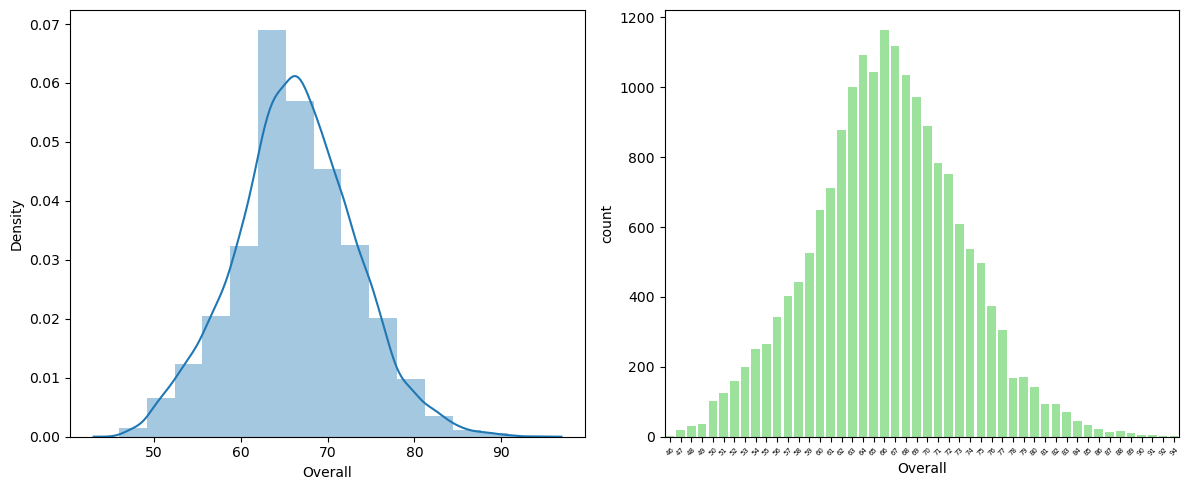

Mean 66.23869940132916


In [117]:
fig,ax = plt.subplots(1,2, figsize=(12,5))

sns.distplot(df_fifa['Overall'], bins=15, ax=ax[0])

sns.countplot(x=df_fifa['Overall'], ax=ax[1], color='lightgreen')

ax[1].tick_params(axis='x', rotation=45, labelsize=5)

plt.tight_layout()
plt.show()
print('Mean', df_fifa['Overall'].mean())

In [118]:
# Findings-
# Majority of the players have ratings between 56-77
# Minimum Rating is 46 and maximum is around 94 
# The overall rating ranges from around 45-95.
# Maximum number of players has rating of 66
# Box plot shows there are outliers present

In [119]:
###Question-11 Retrieve the names of top20 players based on the Overall rating.

In [120]:
df_fifa.nlargest(20, 'Overall')[['Name', 'Overall']]

,Name,Overall
0,L. Messi,94
1,Cristiano Ronaldo,94
2,Neymar Jr,92
3,De Gea,91
4,K. De Bruyne,91
5,E. Hazard,91
6,L. Modrić,91
7,L. Suárez,91
8,Sergio Ramos,91
9,J. Oblak,90


In [121]:
##Question-12 Generate a dataframe which should include all the information of the Top 20 players based on the Overall rating.

In [122]:
sorted_df = df_fifa.sort_values(by='Overall', ascending=False)
top_20 = sorted_df.head(20)
top_20

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,Right,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
12,182493,D. Godín,32,Uruguay,90,90,Atlético Madrid,44000000.0,125000.0,Right,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,90200000.0


In [123]:
##Question-13 What is the average "Age" and "Wage" of these top 20 players

In [124]:
avarage_age = top_20['Age'].mean()
print('The avarage age of top 20 players is:', avarage_age )

avarage_wage = top_20['Wage'].mean()
print('The avarage Wage of top 20 players is:', avarage_wage )

The avarage age of top 20 players is: 29.55
The avarage Wage of top 20 players is: 294950.0


In [125]:
###Question-14 Among the top 20 players based on the Overall rating, which player has the highest wage? Display the name of the player with his wage.

In [126]:
highest_wage_player = top_20.loc[top_20['Wage'].idxmax()]

result_df = pd.DataFrame({
    'Name' : [highest_wage_player['Name']],
    'Wage' : [highest_wage_player['Wage']]
})

print(f"Player with the highest wage in top 20 is: {highest_wage_player['Name']} with wage of {highest_wage_player['Wage']}")
result_df


Player with the highest wage in top 20 is: L. Messi with wage of 565000.0


,Name,Wage
0,L. Messi,565000.0


In [127]:
top_wage = top_20['Wage'].max()
top_palyer_name = top_20['Name'].head(1)

print(f"player with the higest wage is:\n{top_palyer_name} \nwith wage of {top_wage}")

player with the higest wage is:
0    L. Messi
Name: Name, dtype: object 
with wage of 565000.0


In [128]:
###Question-15 Generate a dataframe which should include the "Player name", "Club Name", "Wage", and 'Overall rating'.

In [129]:
new_df = df_fifa[['Name','Club','Wage','Overall']]
new_df

,Name,Club,Wage,Overall
0,L. Messi,FC Barcelona,565000.0,94
1,Cristiano Ronaldo,Juventus,405000.0,94
2,Neymar Jr,Paris Saint-Germain,290000.0,92
3,De Gea,Manchester United,260000.0,91
4,K. De Bruyne,Manchester City,355000.0,91
...,...,...,...,...
18202,J. Lundstram,Crewe Alexandra,1000.0,47
18203,N. Christoffersson,Trelleborgs FF,1000.0,47
18204,B. Worman,Cambridge United,1000.0,47
18205,D. Walker-Rice,Tranmere Rovers,1000.0,47


In [130]:
# i) find the average Overall rating for each club.
overall_rating = new_df[['Overall','Club']].groupby('Club').mean()
overall_rating

,Overall
Club,
SSV Jahn Regensburg,65.586207
1. FC Heidenheim 1846,65.750000
1. FC Kaiserslautern,63.384615
1. FC Köln,70.785714
1. FC Magdeburg,65.615385
...,...
Zagłębie Sosnowiec,60.760000
Çaykur Rizespor,66.900000
Örebro SK,60.481481


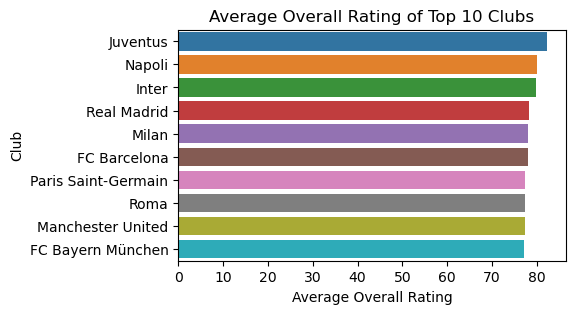

,Club,Overall
0,Juventus,82.280000
1,Napoli,80.000000
2,Inter,79.750000
3,Real Madrid,78.242424
4,Milan,78.074074
5,FC Barcelona,78.030303
6,Paris Saint-Germain,77.433333
7,Roma,77.423077
8,Manchester United,77.242424
9,FC Bayern München,77.000000


In [131]:
# ii) Display the average overall rating of Top10 Clubs using a plot
top_10_clubs = new_df.groupby('Club')['Overall'].mean().nlargest(10).reset_index()

# Average overall rating for the Top 10 clubs 
plt.figure(figsize=(5, 3))
sns.barplot(x='Overall', y='Club', data=top_10_clubs)
plt.title('Average Overall Rating of Top 10 Clubs')
plt.xlabel('Average Overall Rating')
plt.ylabel('Club')
plt.show()
top_10_clubs

In [132]:
#16 What is the relationship between age and individual potential of the player?Visualize the relationship with appropriate plot and Comment on the same.

In [133]:
print("Correlation between Age and individual potential is: ")
df_fifa[['Age','Potential']].corr()
#we can see that as the age goes up the potential goes down

Correlation between Age and individual potential is: 


,Age,Potential
Age,1.000000,-0.253312
Potential,-0.253312,1.000000


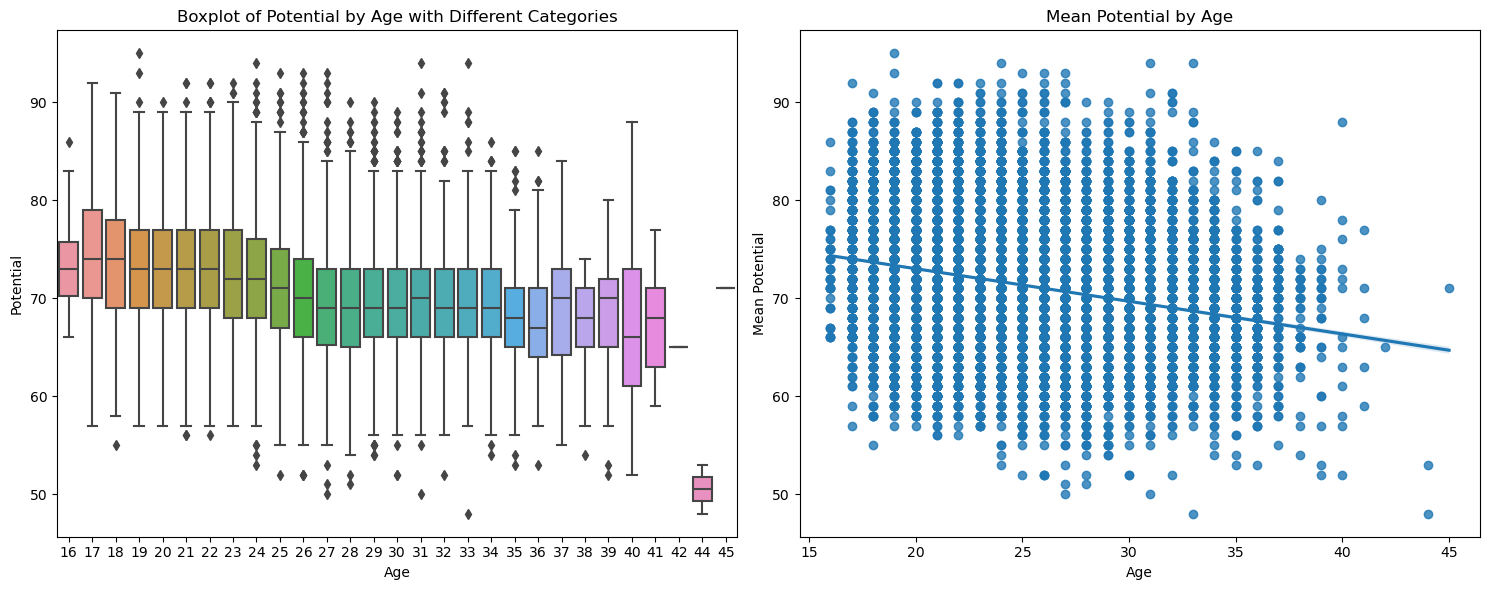

In [142]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x='Age', y='Potential', data=df_fifa)
plt.title('Boxplot of Potential by Age with Different Categories')
plt.xlabel('Age')
plt.ylabel('Potential')

plt.subplot(1,2,2)
sns.regplot(x='Age', y='Potential', data=df_fifa, marker='o')
plt.title('Mean Potential by Age')
plt.xlabel('Age')
plt.ylabel('Mean Potential')

plt.tight_layout()
plt.show()

In [135]:
###17. Which features directly contribute to the wages of the players?
#Support your answer with a plot and a metric

In [141]:
df_fifa.select_dtypes(include=np.number).corr()

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,1.000000,-0.739208,-0.417025,0.047074,-0.138194,-0.204610,-0.356191,-0.075784,-0.056914,0.182074,...,-0.384473,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778,-0.125303
Age,-0.739208,1.000000,0.452350,-0.253312,0.075022,0.141145,0.253765,0.059867,0.027649,-0.241156,...,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313,0.065073
Overall,-0.417025,0.452350,1.000000,0.660939,0.627085,0.571926,0.499491,0.212015,0.414463,-0.218931,...,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276,0.592035
Potential,0.047074,-0.253312,0.660939,1.000000,0.576218,0.486413,0.372993,0.162346,0.354290,-0.010474,...,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341,0.551895
Value,-0.138194,0.075022,0.627085,0.576218,1.000000,0.858442,0.653176,0.165221,0.315651,-0.095132,...,0.450352,0.133862,0.108402,0.087735,-0.028596,-0.028894,-0.030923,-0.027892,-0.028544,0.969670
Wage,-0.204610,0.141145,0.571926,0.486413,0.858442,1.000000,0.668635,0.140849,0.263205,-0.086561,...,0.419597,0.145594,0.126291,0.111025,-0.025595,-0.025177,-0.028325,-0.025489,-0.025992,0.823151
International Reputation,-0.356191,0.253765,0.499491,0.372993,0.653176,0.668635,1.000000,0.128317,0.208153,-0.077298,...,0.392787,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444,0.619546
Weak Foot,-0.075784,0.059867,0.212015,0.162346,0.165221,0.140849,0.128317,1.000000,0.340721,-0.035410,...,0.278132,0.065673,0.042646,0.026105,-0.231905,-0.233098,-0.229395,-0.231298,-0.232574,0.150653
Skill Moves,-0.056914,0.027649,0.414463,0.354290,0.315651,0.263205,0.208153,0.340721,1.000000,-0.035194,...,0.586836,0.241428,0.210517,0.178607,-0.621675,-0.619755,-0.616990,-0.618853,-0.621925,0.291598
Jersey Number,0.182074,-0.241156,-0.218931,-0.010474,-0.095132,-0.086561,-0.077298,-0.035410,-0.035194,1.000000,...,-0.167523,-0.142474,-0.133285,-0.124610,0.004807,0.001543,0.001162,-0.002736,0.003255,-0.090729


In [140]:
wages_rel = df_fifa[['Potential','Overall','Value','International Reputation','Release Clause','Wage']]
wages_rel.corr()
#Observed the impact of all factors on wages. Overall, Potential, Value, International Reputation and Release Clause impact the wage of a player.
#Remaining factors have very less impact on the wage of a player.

,Potential,Overall,Value,International Reputation,Release Clause,Wage
Potential,1.000000,0.660939,0.576218,0.372993,0.551895,0.486413
Overall,0.660939,1.000000,0.627085,0.499491,0.592035,0.571926
Value,0.576218,0.627085,1.000000,0.653176,0.969670,0.858442
International Reputation,0.372993,0.499491,0.653176,1.000000,0.619546,0.668635
Release Clause,0.551895,0.592035,0.969670,0.619546,1.000000,0.823151
Wage,0.486413,0.571926,0.858442,0.668635,0.823151,1.000000


In [138]:
##'Potentail' has least correlation with wages.'Value' has the highest correlation with wages
##'Release Clause','Reputation','Overall' are also storng contributor to wages

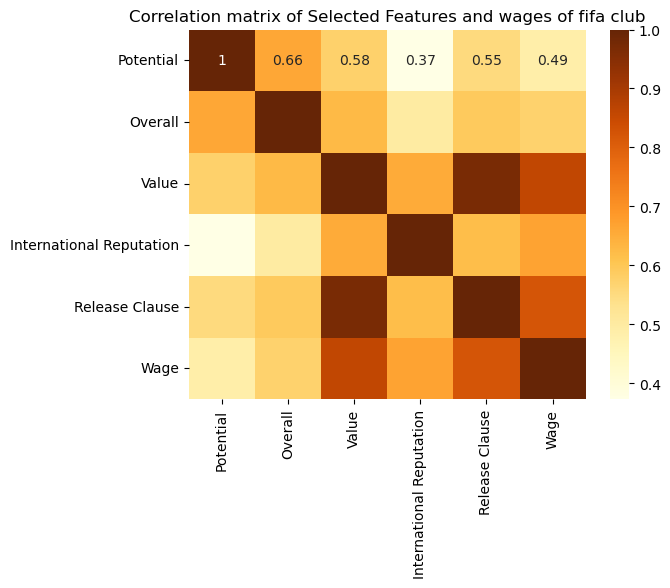

In [152]:
# sns.heatmap(wages_rel.corr(), annot=True)
# plt.title('Correlation matrix of Selected Features and wages of Club')
# plt.show()
sns.heatmap(wages_rel.corr(), annot=True, cmap='YlOrBr')

plt.title("Correlation matrix of Selected Features and wages of fifa club")
plt.show()

In [ ]:
##Question-18 Find the position in the pitch where the maximum number of players play and the position where the minimum number of players play?
##Display it using a plot.

In [154]:
position_count = df_fifa['Position'].value_counts()
position_count

Position
ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: count, dtype: int64

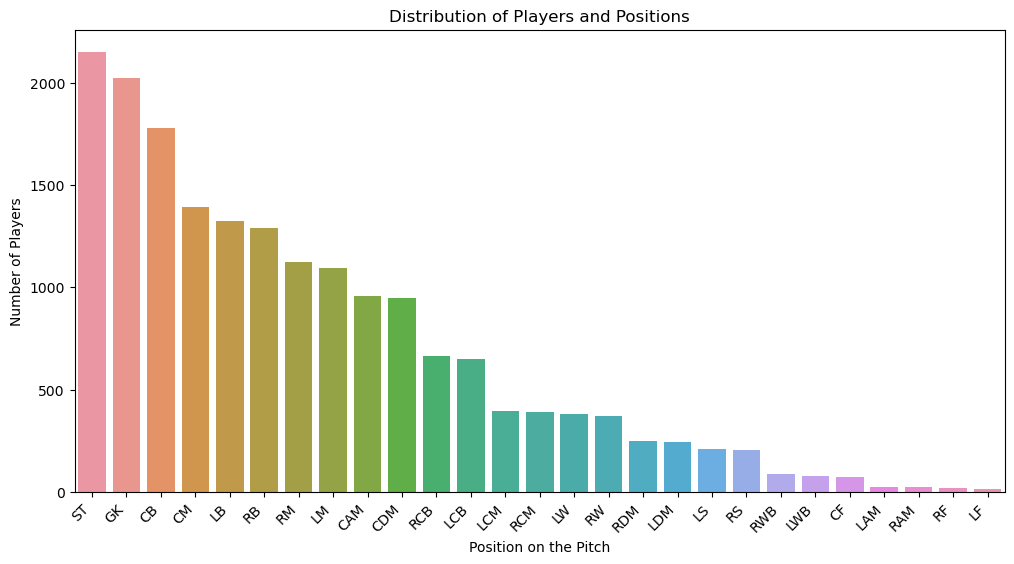

Position with maximum number of players is: ST with (2152 players)
Position with the minimum number of players: LF with (15 players)


In [155]:
plt.figure(figsize=(12,6))
sns.barplot(x=position_count.index, y=position_count.values)
plt.title('Distribution of Players and Positions')
plt.xlabel('Position on the Pitch')
plt.ylabel('Number of Players')
plt.xticks(rotation=45, ha='right')  
plt.show()

max_position = position_count.idxmax()
min_position = position_count.idxmin()

print(f"Position with maximum number of players is: {max_position} with ({position_count[max_position]} players)" )
print(f"Position with the minimum number of players: {min_position} with ({position_count[min_position]} players)")

In [ ]:
###19- How many players are from the club 'Juventus' and the wage is greater than 200K? Display all the information of such players.

In [156]:
df_fifa['Club']

0               FC Barcelona
1                   Juventus
2        Paris Saint-Germain
3          Manchester United
4            Manchester City
                ...         
18202        Crewe Alexandra
18203         Trelleborgs FF
18204       Cambridge United
18205        Tranmere Rovers
18206        Tranmere Rovers
Name: Club, Length: 18207, dtype: object

In [158]:
Juventus_p = np.where((df_fifa['Club'] == 'Juventus') & (df_fifa['Wage'] > 200000))
J_Players = df_fifa.loc[Juventus_p]

print(str(J_Players['Club'].count())+ 'players are from the club Juventus and the wage is greater than 200K')
J_Players

3players are from the club Juventus and the wage is greater than 200K


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
15,211110,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,205000.0,Left,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,153500000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0


In [159]:
###20- Generate a data frame containing top 5 players by Overall rating for each unique position.

In [161]:
u_p = df_fifa['Position'].unique()
u_p

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [163]:
top5_df = df_fifa.groupby('Position').apply(lambda x: x.nlargest(5,'Overall'))
top5_df[['Position','Name','Overall']].head(20)

Position             Name  Overall
Position                                       
CAM      17       CAM     A. Griezmann       89
         31       CAM       C. Eriksen       88
         61       CAM  Roberto Firmino       86
         66       CAM        T. Müller       86
         74       CAM          M. Özil       86
CB       12        CB         D. Godín       90
         42        CB        S. Umtiti       87
         73        CB       M. Benatia       86
         89        CB      N. Otamendi       85
         102       CB            Naldo       85
CDM      20       CDM  Sergio Busquets       89
         27       CDM         Casemiro       88
         72       CDM        M. Pjanić       86
         75       CDM      Fernandinho       86
         118      CDM          Fabinho       84
CF       271       CF     Luis Alberto       82
         293       CF      S. Giovinco       82
         350       CF         A. Milik       81
         382       CF        L. Stindl       81
         407       CF          Raffael       81

In [ ]:
###Question-21 What is the average wage one can expect to pay for the top 5 players in every position?

In [164]:
top5_df['Wage'].groupby('Position').describe().T

Position,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
count,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,5.000000,5.000000,5.000000
mean,174000.000000,139600.00000,217000.000000,47400.000000,130600.000000,192800.000000,81600.000000,177200.000000,162000.000000,184400.000000,...,155400.000000,231000.000000,240800.000000,105000.000000,148000.0,131400.000000,132200.000000,202000.000000,44200.000000,294000.000000
std,31701.734968,63547.61994,80669.077099,22645.087768,38720.795446,75294.090074,130639.963258,88015.339572,35637.059362,133760.233253,...,41692.925059,89610.267269,153700.032531,65349.062732,239000.0,71640.072585,184512.059226,14832.396974,30044.966301,89330.845737
min,135000.000000,38000.00000,120000.000000,15000.000000,73000.000000,94000.000000,13000.000000,81000.000000,115000.000000,22000.000000,...,82000.000000,160000.000000,77000.000000,51000.000000,11000.0,72000.000000,15000.000000,180000.000000,24000.000000,205000.000000
25%,145000.000000,125000.00000,180000.000000,41000.000000,120000.000000,130000.000000,23000.000000,110000.000000,155000.000000,125000.000000,...,165000.000000,165000.000000,92000.000000,59000.000000,12000.0,100000.000000,28000.000000,195000.000000,28000.000000,205000.000000
50%,190000.000000,160000.00000,185000.000000,43000.000000,130000.000000,240000.000000,26000.000000,160000.000000,160000.000000,135000.000000,...,170000.000000,210000.000000,260000.000000,80000.000000,17000.0,105000.000000,48000.000000,205000.000000,33000.000000,300000.000000
75%,195000.000000,170000.00000,285000.000000,67000.000000,155000.000000,240000.000000,31000.000000,250000.000000,165000.000000,285000.000000,...,175000.000000,240000.000000,355000.000000,125000.000000,135000.0,125000.000000,115000.000000,215000.000000,39000.000000,355000.000000
max,205000.000000,205000.00000,315000.000000,71000.000000,175000.000000,260000.000000,315000.000000,285000.000000,215000.000000,355000.000000,...,185000.000000,380000.000000,420000.000000,210000.000000,565000.0,255000.000000,455000.000000,215000.000000,97000.000000,405000.000000


In [166]:
top5_df['Wage'].groupby('Position').mean().to_frame()

,Wage
Position,
CAM,174000.0
CB,139600.0
CDM,217000.0
CF,47400.0
CM,130600.0
GK,192800.0
LAM,81600.0
LB,177200.0
LCB,162000.0
